In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 

In [2]:
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


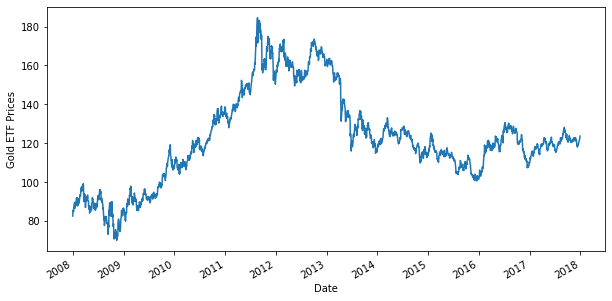

In [3]:
Df = yf.download('GLD','2008-01-01','2017-12-31') 
Df=Df[['Close']] 
Df= Df.dropna() 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("Gold ETF Prices")
plt.show()

In [4]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2008-01-14,87.793335,85.883333
2008-01-15,88.790001,86.670000
2008-01-16,88.703334,87.017777
2008-01-17,88.076665,87.143333
2008-01-18,87.063332,87.295555


In [5]:
y = Df['Close']
y.head()

Date
2008-01-14    89.540001
2008-01-15    87.989998
2008-01-16    86.699997
2008-01-17    86.500000
2008-01-18    87.419998
Name: Close, dtype: float64

In [6]:
t=.8 
t = int(t*len(Df)) 
X_train = X[:t] 
y_train = y[:t]  
X_test = X[t:] 
y_test = y[t:]

In [7]:
linear = LinearRegression().fit(X_train,y_train) 
print("Gold ETF Price=", round(linear.coef_[0],2), 
"* 3 Days Moving Average", round(linear.coef_[1],2), 
"* 9 Days Moving Average +", round(linear.intercept_,2))

Gold ETF Price= 1.19 * 3 Days Moving Average -0.2 * 9 Days Moving Average + 0.37


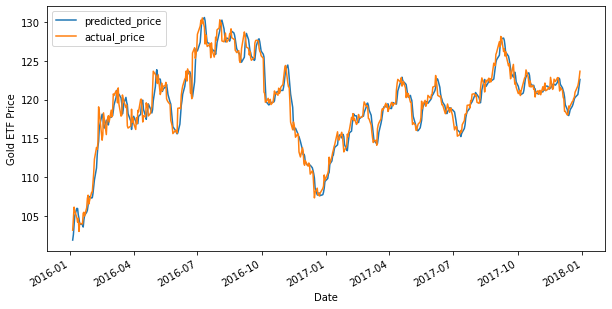

In [8]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Gold ETF Price")  
plt.show()

In [9]:
r2_score = linear.score(X[t:],y[t:])*100  
float("{0:.2f}".format(r2_score))

94.91